In [22]:
import pandas as pd
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
import h5py
import pickle
import imageio
from skimage.transform import resize

In [23]:
h5 = h5py.File('../data/nyu_depth_v2_labeled.mat', 'r')
print(h5.keys())

KeysView(<HDF5 file "nyu_depth_v2_labeled.mat" (mode r)>)


In [24]:
images = h5.get('images').value
print('Images shape:', images.shape)

depths = h5.get('depths').value
print('Depths shape:', depths.shape)

Images shape: (1449, 3, 640, 480)
Depths shape: (1449, 640, 480)


In [25]:
# Transpose images
depths = depths.transpose(0, 2, 1)
images = images.transpose(0, 3, 2, 1)

In [26]:
def plot_images(original, depth):
    plt.figure(figsize=(18, 14))
    plt.subplot(121)
    plt.imshow(original)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(depth)
    plt.axis('off');

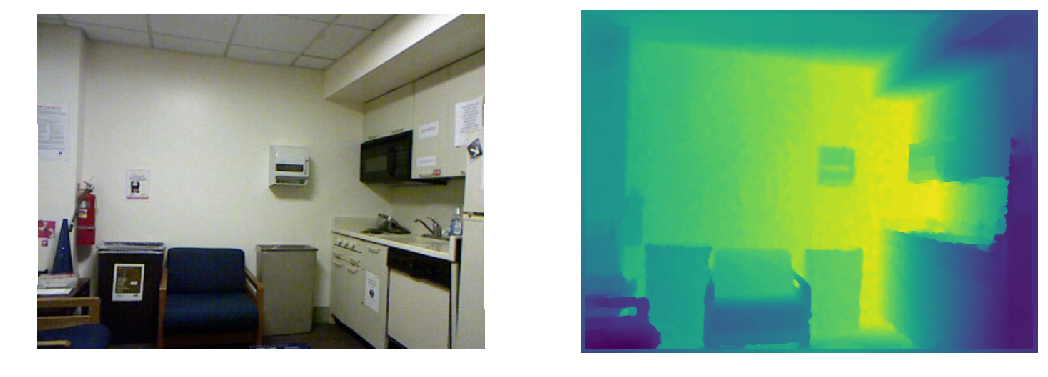

In [27]:
# Plot original image
sample_img = 0

plot_images(images[sample_img], depths[sample_img])
plt.axis('on')

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


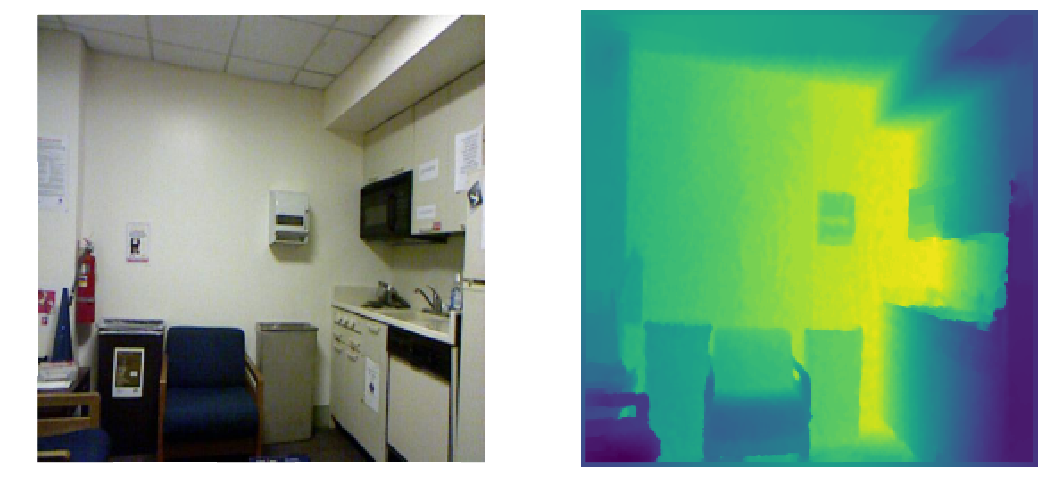

In [28]:
# Plot resized images
plot_images(resize(images[sample_img], (256, 256, 3)),
            resize(depths[sample_img] / 255., (256, 256)))

In [35]:
def convert_depth(gray, cm='jet'):
    cmap = plt.get_cmap(cm)
    
    rgba_img = cmap(gray / np.max(gray))
    rgb_img = np.delete(rgba_img, 3, 2)
    
    return rgb_img

In [36]:
# Convert depth to rgb depths
rgb_depths = [convert_depth(img) for img in depths]

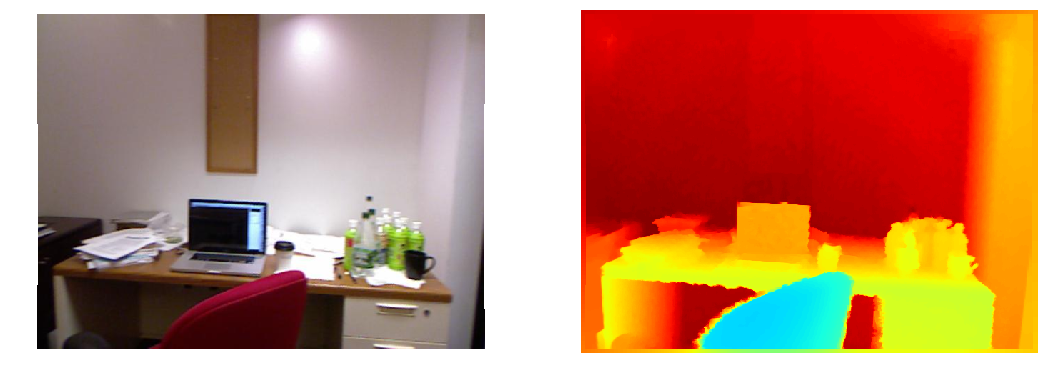

In [47]:
# Plot image and rgb depth
sample_img = 3
plot_images(images[sample_img] / 255.,
            rgb_depths[sample_img])

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


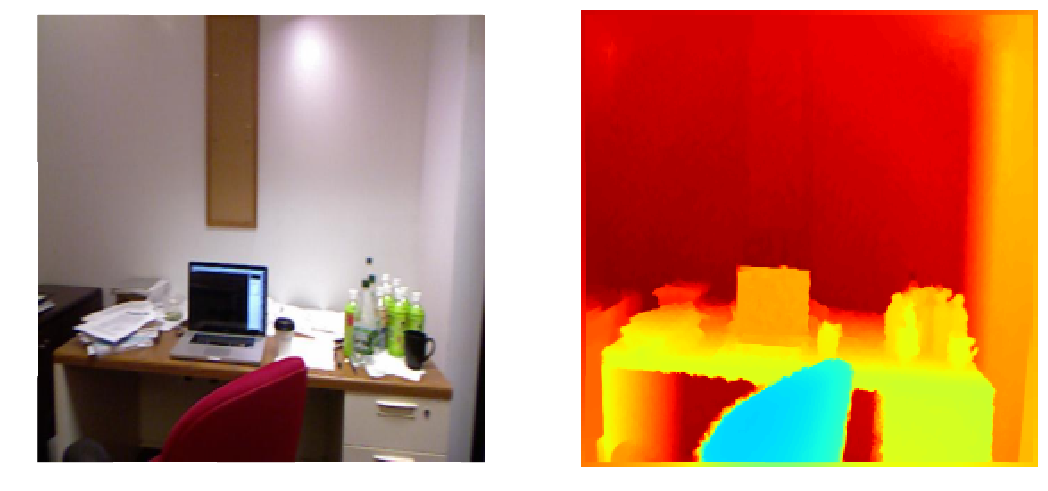

In [46]:
# Plot resized image and resized rgb depth
plot_images(resize(images[sample_img] / 255., (256, 256, 3)),
            resize(rgb_depths[sample_img], (256, 256, 3)))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


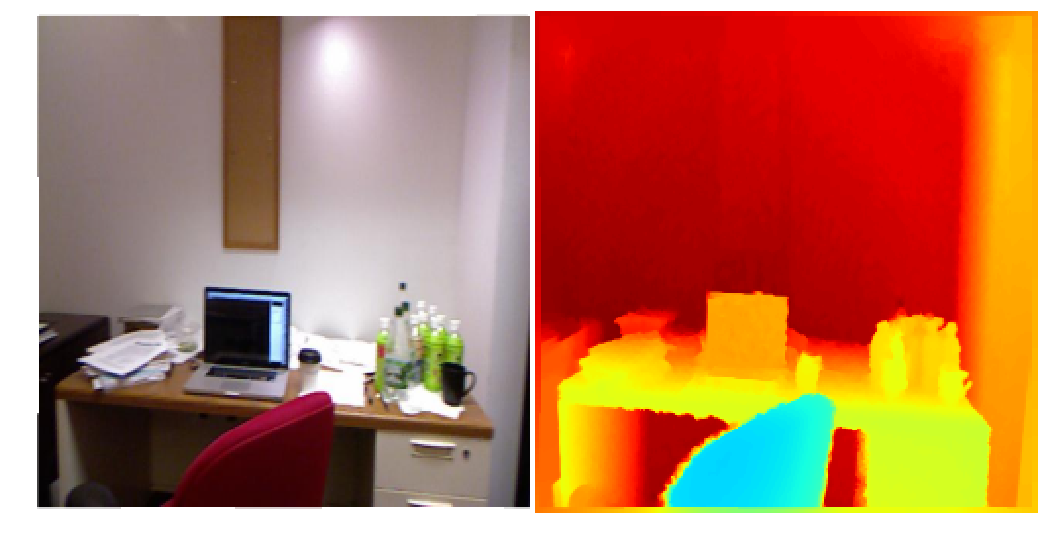

In [48]:
# Resize and concatenate
plt.figure(figsize=(18, 14))
plt.imshow(np.concatenate([resize(images[sample_img] / 255., (256, 256, 3)), 
                           resize(rgb_depths[sample_img], (256, 256, 3))], axis=1))
plt.axis('off');

In [16]:
concat_imgs = np.empty((images.shape[0], images.shape[1], images.shape[2] * 2, images.shape[3]))
for i in range(images.shape[0]):
    concat_imgs[i] = np.concatenate([images[i].astype(np.uint8), (rgb_depths[i] * 255).astype(np.uint8)], axis=1)

In [17]:
concat_imgs.shape

(1449, 480, 1280, 3)

In [18]:
concat_imgs[0].shape

(480, 1280, 3)

In [ ]:
for i in range(concat_imgs.shape[0]):
    imageio.imsave('../data/imgs/' + str(i).zfill(4) + '.png', concat_imgs[i])

In [ ]:
imageio.imsave('../data/imgs/' + str(0).zfill(4) + '.png', concat_imgs[0])

In [ ]:
plt.imshow(imageio.imread('../data/imgs/0000.png'))